In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [32]:
!pip install matplotlib seaborn

In [42]:
df = pd.read_csv('C:/Users/DELL/Downloads/archive (4)/online_courses_uses.csv')

In [43]:
df.shape

(10000, 9)

In [44]:
df.head(10)

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,1,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252
1,2,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329
2,3,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950
3,4,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732
4,5,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968
5,6,Course_6,Finance,66,3792,96.671900,edX,127.509920,3.252283
6,7,Course_7,Marketing,29,2607,71.830441,Coursera,155.541117,4.101807
7,8,Course_8,Design,21,964,99.076272,edX,79.940944,3.088730
8,9,Course_9,Programming,57,1246,78.817622,LinkedIn Learning,174.677480,4.498471
9,10,Course_10,Design,59,489,58.896068,edX,82.094819,3.341868


In [45]:
df.columns

Index(['Course_ID', 'Course_Name', 'Category', 'Duration (hours)',
       'Enrolled_Students', 'Completion_Rate (%)', 'Platform', 'Price ($)',
       'Rating (out of 5)'],
      dtype='object')

In [46]:
df.dtypes

Course_ID                int64
Course_Name             object
Category                object
Duration (hours)         int64
Enrolled_Students        int64
Completion_Rate (%)    float64
Platform                object
Price ($)              float64
Rating (out of 5)      float64
dtype: object

In [47]:
df.describe()

,Course_ID,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,55.144000,2530.653000,75.119729,106.391332,3.994154
std,2886.89568,26.199242,1423.808243,14.462138,55.100685,0.575502
min,1.00000,10.000000,101.000000,50.008183,10.037145,3.000026
25%,2500.75000,32.000000,1289.000000,62.629516,58.613731,3.490250
50%,5000.50000,55.000000,2532.000000,75.156568,108.042392,4.002789
75%,7500.25000,78.000000,3764.000000,87.595268,153.945558,4.483662
max,10000.00000,100.000000,5000.000000,99.994300,199.962412,4.999176


In [48]:
df.isna().sum()

Course_ID              0
Course_Name            0
Category               0
Duration (hours)       0
Enrolled_Students      0
Completion_Rate (%)    0
Platform               0
Price ($)              0
Rating (out of 5)      0
dtype: int64

In [49]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [50]:
df.loc[df.duplicated()]

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)


In [51]:
top_10_courses = df.nlargest(10, 'Rating (out of 5)')[['Course_Name', 'Rating (out of 5)']]

In [52]:
top_10_courses

,Course_Name,Rating (out of 5)
2504,Course_2505,4.999176
8150,Course_8151,4.999040
7542,Course_7543,4.998960
9549,Course_9550,4.998596
2078,Course_2079,4.998162
832,Course_833,4.998118
4349,Course_4350,4.998098
2695,Course_2696,4.997831
7843,Course_7844,4.997627
5392,Course_5393,4.997617


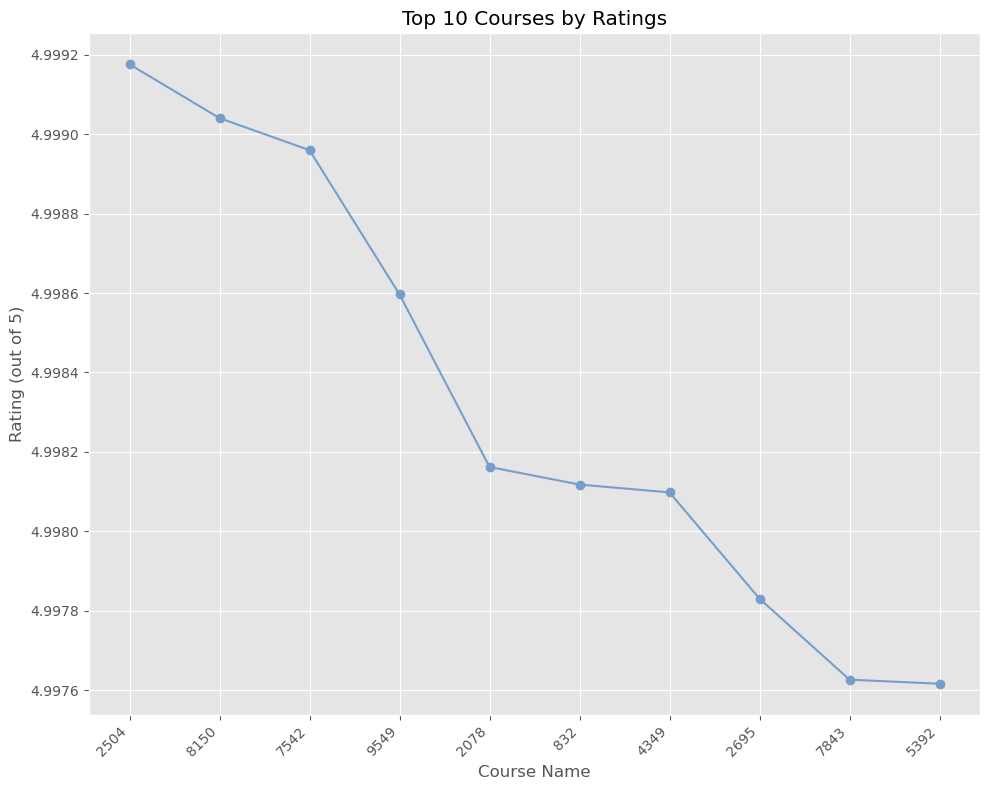

In [67]:
ax = top_10_courses.set_index('Course_Name')['Rating (out of 5)'].plot(
    kind='line',  # Line chart
    title='Top 10 Courses by Ratings',
    color='#779ECB',  # Light pastel blue
    figsize=(10, 8),  # Increased figure size for better readability
    marker='o'  # Adding markers to the line chart
)

ax.set_xlabel('Course Name')
ax.set_ylabel('Rating (out of 5)')

# Ensure all xticks are visible
ax.set_xticks(range(len(top_10_courses.index)))
ax.set_xticklabels(top_10_courses.index, rotation=45, ha='right')  # Rotate and align labels

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

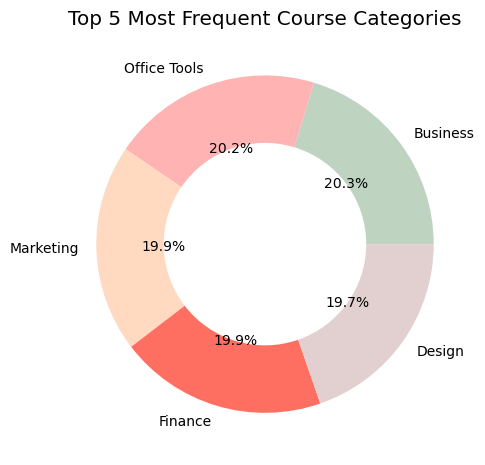

In [77]:
top_5_categories = df['Category'].value_counts().head(5)
ax = top_5_categories.plot(
    kind='pie',  # Pie chart
    title='Top 5 Most Frequent Course Categories',
    colors=['#BFD3C1', '#FFB3B3', '#FFDAC1', '#FF6F61', '#E2CFCF'],  # Pastel colors
    figsize=(5, 5),
    autopct='%1.1f%%',  # Show percentage
    wedgeprops=dict(width=0.4)  # Width of the pie slices
)

ax.set_ylabel('')  

plt.tight_layout()  
plt.show()

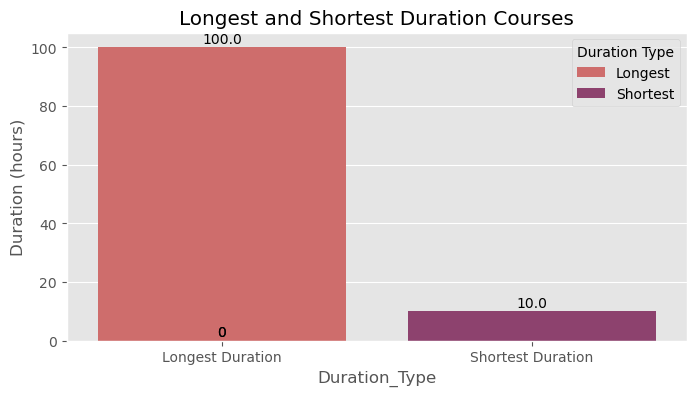

In [65]:
plot_data = pd.DataFrame({
    'Duration_Type': ['Longest Duration', 'Shortest Duration'],
    'Duration (hours)': [
        longest_duration_course['Duration (hours)'].values[0], 
        shortest_duration_course['Duration (hours)'].values[0]
    ],
    'Type': ['Longest', 'Shortest']  # Adding a 'Type' column for hue
})

# Plotting
plt.figure(figsize=(8, 4))  # Adjusted size of the graph
ax = sns.barplot(data=plot_data, x='Duration_Type', y='Duration (hours)', hue='Type', palette='flare')
plt.title('Longest and Shortest Duration Courses')
plt.ylabel('Duration (hours)')
plt.legend(title='Duration Type')

# Add labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.text(
        p.get_x() + width / 2,
        p.get_height() + 0.5,
        f'{p.get_height()}',
        ha='center',
        va='bottom'
    )

plt.show()

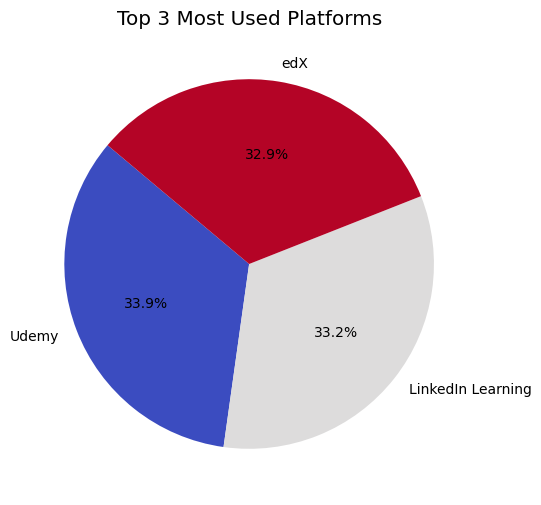

In [71]:
labels = top_3_platforms.index
sizes = top_3_platforms.values
colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, len(labels)))  # Use the 'coolwarm' colormap

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Most Used Platforms')
plt.show()

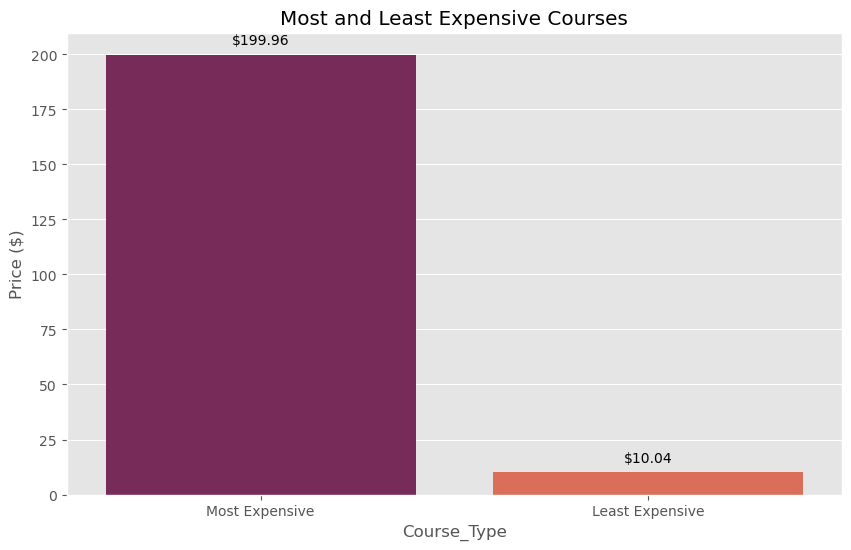

In [75]:
most_expensive_course = df[df['Price ($)'] == df['Price ($)'].max()][['Course_Name', 'Price ($)']]
lowest_price_course = df[df['Price ($)'] == df['Price ($)'].min()][['Course_Name', 'Price ($)']]

# Combine data for plotting
plot_data = pd.DataFrame({
    'Course_Type': ['Most Expensive', 'Least Expensive'],
    'Price ($)': [most_expensive_course['Price ($)'].values[0], lowest_price_course['Price ($)'].values[0]]
})

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Course_Type', y='Price ($)', data=plot_data, hue='Course_Type', palette='rocket', legend=False)

# Add price on bars with two decimal places
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'${height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('Most and Least Expensive Courses')
plt.ylabel('Price ($)')
plt.show()

In [81]:
top_course = df[df['Enrolled_Students'] == df['Enrolled_Students'].max()][['Course_Name', 'Enrolled_Students', 'Platform']]

course_name = top_course['Course_Name'].values[0]
number_of_students = top_course['Enrolled_Students'].values[0]
platform = top_course['Platform'].values[0]

print(f"Course with the highest number of students: {course_name}")
print(f"Number of students: {number_of_students}")
print(f"Platform: {platform}")

Course with the highest number of students: Course_2565
Number of students: 5000
Platform: LinkedIn Learning


In [82]:
df.columns

Index(['Course_ID', 'Course_Name', 'Category', 'Duration (hours)',
       'Enrolled_Students', 'Completion_Rate (%)', 'Platform', 'Price ($)',
       'Rating (out of 5)'],
      dtype='object')

In [83]:
# Assuming the DataFrame has 'Completion_Rate (%)' and 'Platform' columns

# Course with the least completion rate
least_completion = df[df['Completion_Rate (%)'] == df['Completion_Rate (%)'].min()][['Course_Name', 'Completion_Rate (%)', 'Platform']]

# Course with the highest completion rate
highest_completion = df[df['Completion_Rate (%)'] == df['Completion_Rate (%)'].max()][['Course_Name', 'Completion_Rate (%)', 'Platform']]

# Average completion rate
average_completion_rate = df['Completion_Rate (%)'].mean()

# Find the course closest to the average completion rate
closest_to_average = df.iloc[(df['Completion_Rate (%)'] - average_completion_rate).abs().argsort()[:1]][['Course_Name', 'Completion_Rate (%)', 'Platform']]

# Extract the relevant details
least_course_name = least_completion['Course_Name'].values[0]
least_completion_rate = least_completion['Completion_Rate (%)'].values[0]
least_platform = least_completion['Platform'].values[0]

highest_course_name = highest_completion['Course_Name'].values[0]
highest_completion_rate = highest_completion['Completion_Rate (%)'].values[0]
highest_platform = highest_completion['Platform'].values[0]

average_course_name = closest_to_average['Course_Name'].values[0]
average_completion_rate = closest_to_average['Completion_Rate (%)'].values[0]
average_platform = closest_to_average['Platform'].values[0]

# Output the results
print(f"Course with the least completion rate: {least_course_name}")
print(f"Completion rate: {least_completion_rate}%")
print(f"Platform: {least_platform}")

print(f"\nCourse with the highest completion rate: {highest_course_name}")
print(f"Completion rate: {highest_completion_rate}%")
print(f"Platform: {highest_platform}")

print(f"\nCourse closest to the average completion rate: {average_course_name}")
print(f"Completion rate: {average_completion_rate}%")
print(f"Platform: {average_platform}")


Course with the least completion rate: Course_9266
Completion rate: 50.00818295790632%
Platform: LinkedIn Learning

Course with the highest completion rate: Course_340
Completion rate: 99.99429955041644%
Platform: Udemy

Course closest to the average completion rate: Course_3327
Completion rate: 75.11893437589929%
Platform: edX


C:\Users\DELL\AppData\Local\Temp\ipykernel_11080\4109522916.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Course_Type', y='Completion_Rate (%)', data=plot_data, palette='pastel')
C:\Users\DELL\AppData\Local\Temp\ipykernel_11080\4109522916.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


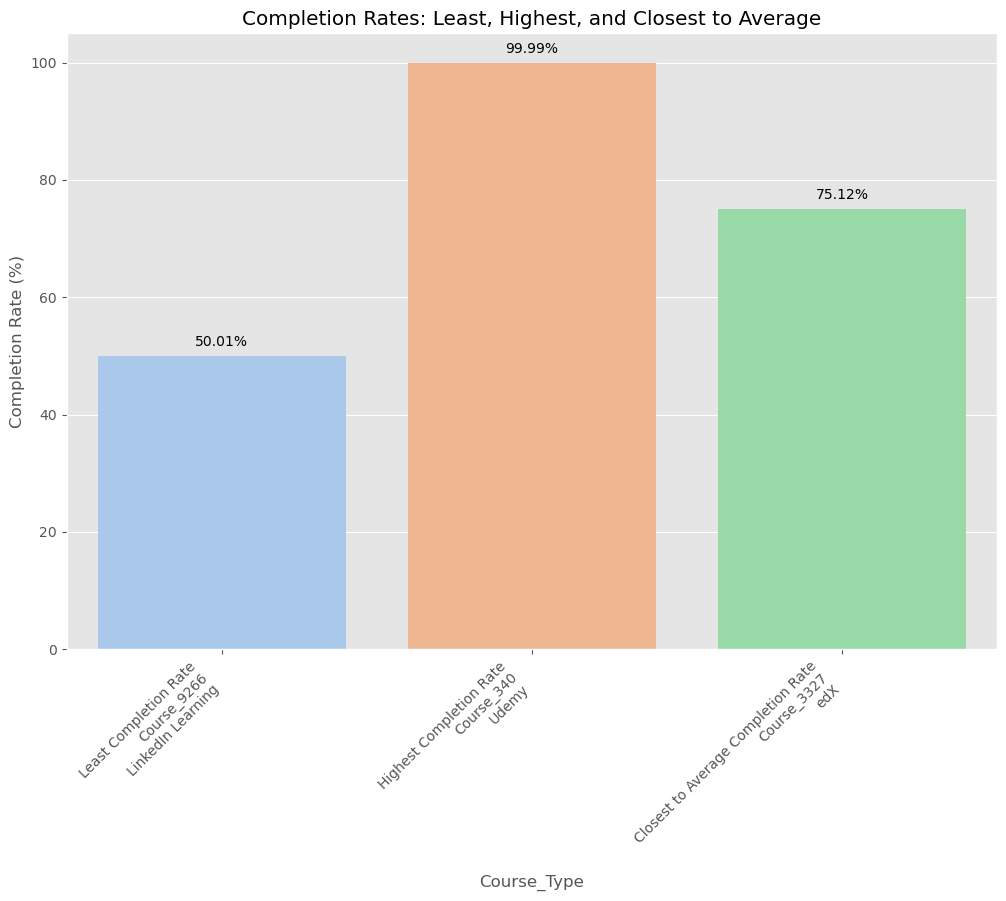

In [84]:


# Prepare the data
data = {
    'Course_Type': ['Least Completion Rate', 'Highest Completion Rate', 'Closest to Average Completion Rate'],
    'Completion_Rate (%)': [
        least_completion['Completion_Rate (%)'].values[0],
        highest_completion['Completion_Rate (%)'].values[0],
        average_completion_rate
    ],
    'Course_Name': [
        least_course_name,
        highest_course_name,
        average_course_name
    ],
    'Platform': [
        least_platform,
        highest_platform,
        average_platform
    ]
}

plot_data = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Course_Type', y='Completion_Rate (%)', data=plot_data, palette='pastel')

# Add completion rate on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

# Add course names and platforms as labels on the x-axis
ax.set_xticklabels(
    plot_data['Course_Type'] + '\n' +
    plot_data['Course_Name'] + '\n' +
    plot_data['Platform'], 
    rotation=45, 
    ha='right'
)

# Title and labels
plt.title('Completion Rates: Least, Highest, and Closest to Average')
plt.ylabel('Completion Rate (%)')
plt.show()
